In [1]:
#data preprocessing

In [2]:
import pandas as pd

In [3]:
#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree

In [4]:
!pip install xgboost

In [5]:
import xgboost as xgb

In [6]:

#the outcome (dependent variable) has only a limited number of possible values. 

In [7]:
#Logistic Regression is used when response variable is categorical in nature.

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
#A random forest is a meta estimator that fits a number of decision tree classifiers

In [10]:
#on various sub-samples of the dataset and use averaging to improve the predictive 

In [11]:
#accuracy and control over-fitting.

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
#a discriminative classifier formally defined by a separating hyperplane.

In [14]:
from sklearn.svm import SVC

In [15]:
#displayd data

In [16]:
from IPython.display import display

In [17]:
%matplotlib inline

In [18]:
# Read data and drop redundant column.

In [19]:
data = pd.read_csv('final_dataset.csv')

In [20]:
# Preview data.

In [21]:
display(data.head())

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,5700,8/8/2015,Bournemouth,Aston Villa,0,1,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1
1,5701,8/8/2015,Chelsea,Swansea,2,2,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-7
2,5702,8/8/2015,Everton,Watford,2,2,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-7
3,5703,8/8/2015,Leicester,Sunderland,4,2,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-2
4,5704,8/8/2015,Man United,Tottenham,1,0,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-1


In [22]:
#Full Time Result (H=Home Win, D=Draw, A=Away Win)

In [23]:
#HTGD - Home team goal difference

In [24]:
#ATGD - away team goal difference

In [25]:
#HTP - Home team points

In [26]:
#ATP - Away team points

In [27]:
#DiffFormPts Diff in points

In [28]:
#DiffLP - Differnece in last years prediction


In [29]:
#Input - 12 other features (fouls, shots, goals, misses,corners, red card, yellow cards)

In [30]:
#Output - Full Time Result (H=Home Win, D=Draw, A=Away Win)

In [31]:
#what is the win rate for the home team?

In [32]:
# Total number of matches.

In [33]:
n_matches = data.shape[0]

In [34]:

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)

In [35]:
n_features = data.shape[1] - 1

In [36]:
# Calculate matches won by home team.

In [37]:
n_homewins = len(data[data.FTR == 'H'])

In [38]:
# Calculate win rate for home team.

In [39]:
win_rate = (float(n_homewins) / (n_matches)) * 100

In [40]:
# Print the results

In [41]:
print ("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print ("Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))




Total number of matches: 380
Number of features: 42
Number of matches won by home team: 157
Win rate of home team: 41.32%


In [42]:
# Visualising distribution of data

In [43]:
from pandas.plotting import scatter_matrix

In [44]:
#the scatter matrix is plotting each of the columns specified against each other column.

In [45]:
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 

In [46]:
#section of the plot matrix where the variable is against itself, a histogram is plotted.

In [47]:
#Scatter plots show how much one variable is affected by another. 

In [48]:
#The relationship between two variables is called their correlation

In [49]:
#negative vs positive correlation

In [50]:
#HTGD - Home team goal difference

In [51]:
#ATGD - away team goal difference

In [52]:
#HTP - Home team points

In [53]:
#ATP - Away team points

In [54]:
#DiffFormPts Diff in points

In [55]:
#DiffLP - Differnece in last years prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1099B330>,
      dtype=object)

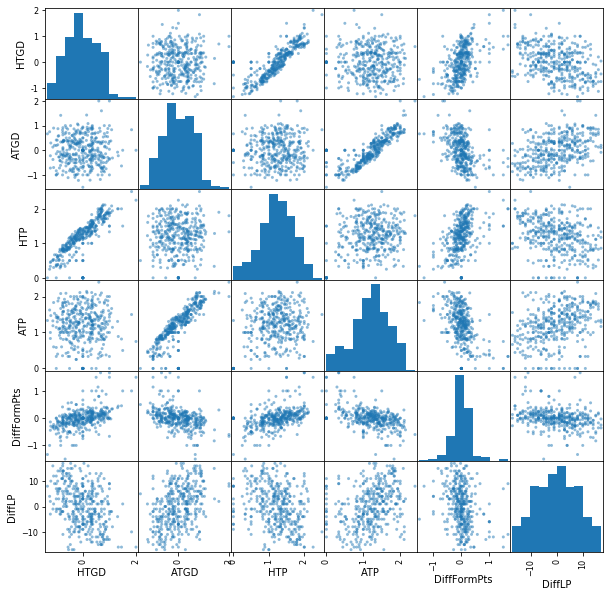

In [56]:

scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10))


In [57]:
# Separate into feature set and target variable

In [58]:
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)

In [59]:
X_all = data.drop(['FTR'],1)

In [60]:
y_all = data['FTR']

In [61]:

# Standardising the data.

In [62]:
from sklearn.preprocessing import scale

In [63]:

#Center to the mean and component wise scale to unit variance.

In [64]:
cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]

In [65]:
for col in cols:
    X_all[col] = scale(X_all[col])



In [66]:
#last 3 wins for both sides

In [67]:
X_all.HM1 = X_all.HM1.astype('str')

In [68]:
X_all.HM2 = X_all.HM2.astype('str')

In [69]:
X_all.HM3 = X_all.HM3.astype('str')

In [70]:
X_all.AM1 = X_all.AM1.astype('str')

In [71]:
X_all.AM2 = X_all.AM2.astype('str')

In [72]:
X_all.AM3 = X_all.AM3.astype('str')

In [73]:
#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output


In [74]:
X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))


Processed feature columns (606 total features):
['Unnamed: 0', 'Date_1/11/2015', 'Date_1/13/2016', 'Date_1/16/2016', 'Date_1/17/2016', 'Date_1/18/2016', 'Date_1/23/2016', 'Date_1/24/2016', 'Date_1/3/2016', 'Date_1/5/2016', 'Date_10/17/2015', 'Date_10/18/2015', 'Date_10/19/2015', 'Date_10/24/2015', 'Date_10/25/2015', 'Date_10/31/2015', 'Date_10/4/2016', 'Date_10/5/2016', 'Date_10/8/2015', 'Date_11/21/2015', 'Date_11/22/2015', 'Date_11/23/2015', 'Date_11/28/2015', 'Date_11/29/2015', 'Date_11/5/2016', 'Date_12/1/2016', 'Date_12/12/2015', 'Date_12/13/2015', 'Date_12/14/2015', 'Date_12/19/2015', 'Date_12/20/2015', 'Date_12/21/2015', 'Date_12/26/2015', 'Date_12/28/2015', 'Date_12/29/2015', 'Date_12/3/2016', 'Date_12/30/2015', 'Date_12/9/2015', 'Date_2/1/2016', 'Date_2/11/2015', 'Date_2/13/2016', 'Date_2/14/2016', 'Date_2/2/2016', 'Date_2/27/2016', 'Date_2/28/2016', 'Date_2/3/2016', 'Date_2/4/2016', 'Date_2/5/2016', 'Date_3/1/2016', 'Date_3/10/2015', 'Date_3/13/2016', 'Date_3/14/2016', 'Date_

In [75]:
# Show the feature information by printing the first five rows
print ("\nFeature values:")
display(X_all.head())



Feature values:


,Unnamed: 0,Date_1/11/2015,Date_1/13/2016,Date_1/16/2016,Date_1/17/2016,Date_1/18/2016,Date_1/23/2016,Date_1/24/2016,Date_1/3/2016,Date_1/5/2016,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,5700,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.001635,-0.004863,0.0,0.0,0.124332
1,5701,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.001635,-0.004863,0.0,0.0,-0.870325
2,5702,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.001635,-0.004863,0.0,0.0,-0.870325
3,5703,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.001635,-0.004863,0.0,0.0,-0.248664
4,5704,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.001635,-0.004863,0.0,0.0,-0.124332


In [76]:
!pip3 install scikit-learn
!pip3 install scikit-image


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [78]:

from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

In [79]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [80]:
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print ('')

Training a LogisticRegression using a training set size of 330. . .


c:\users\aditya das\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Trained model in 1.1728 seconds
Made predictions in 0.0092 seconds.
0.981549815498155 0.9848484848484849
F1 score and accuracy score for training set: 0.9815 , 0.9848.
Made predictions in 0.0074 seconds.
F1 score and accuracy score for test set: 0.9048 , 0.9200.

Training a SVC using a training set size of 330. . .
Trained model in 1.0463 seconds
Made predictions in 0.1361 seconds.
0.0 0.5878787878787879
F1 score and accuracy score for training set: 0.0000 , 0.5879.
Made predictions in 0.0296 seconds.
F1 score and accuracy score for test set: 0.0000 , 0.5800.

Training a XGBClassifier using a training set size of 330. . .
Trained model in 1.8541 seconds
Made predictions in 0.0372 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0286 seconds.
F1 score and accuracy score for test set: 1.0000 , 1.0000.



In [81]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer



# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  
# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='H')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print (clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test, y_test)
print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=2,
              silent=None, subsample=0.8, verbosity=1)
Made predictions in 0.0533 seconds.
F1 score and accuracy score for training set: 0.9819 , 0.9848.
Made predictions in 0.0594 seconds.
F1 score and accuracy score for test set: 0.9333 , 0.9400.


In [82]:
#prediction

In [83]:
clf.predict(X_test[2])

KeyError: 2

In [84]:
!pip install seaborn

In [85]:
import seaborn as sns


In [86]:
#get correlations of each features in dataset

In [87]:
corrmat = data.corr()

In [88]:
top_corr_features = corrmat.index

In [89]:
!pip install matplotlib

In [90]:
import matplotlib.pyplot as plt

In [91]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

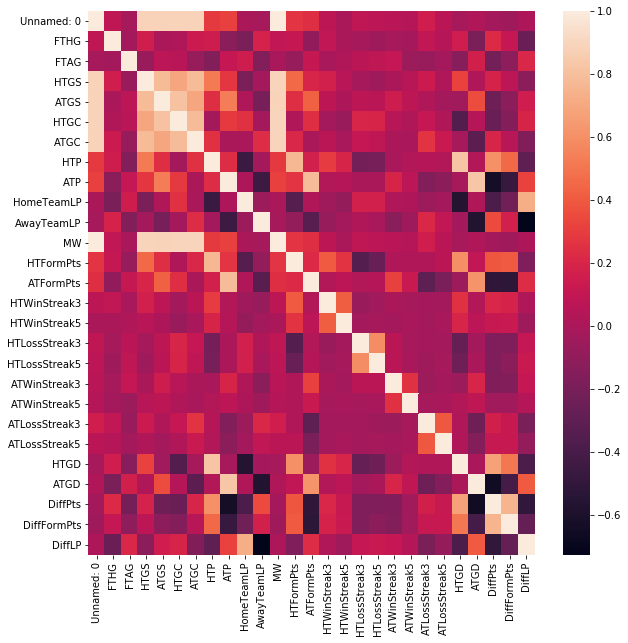

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), ax=ax)
plt.show()

In [93]:
#plot heat map

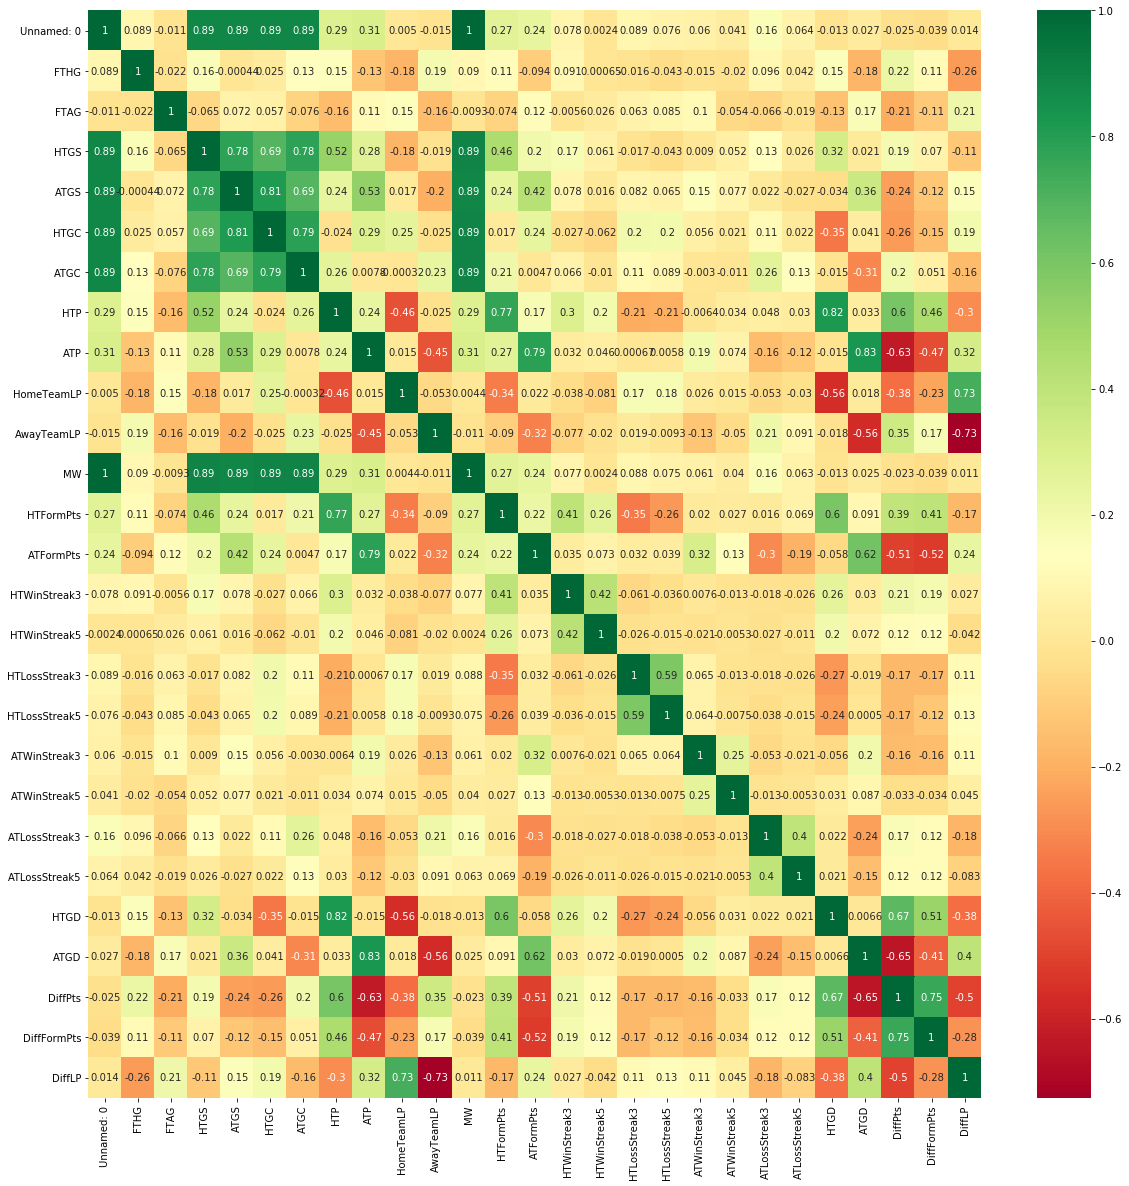

In [94]:
fig, ax = plt.subplots(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(), ax=ax, annot=True,annot_kws={'size':10}, cmap="RdYlGn")
plt.show()

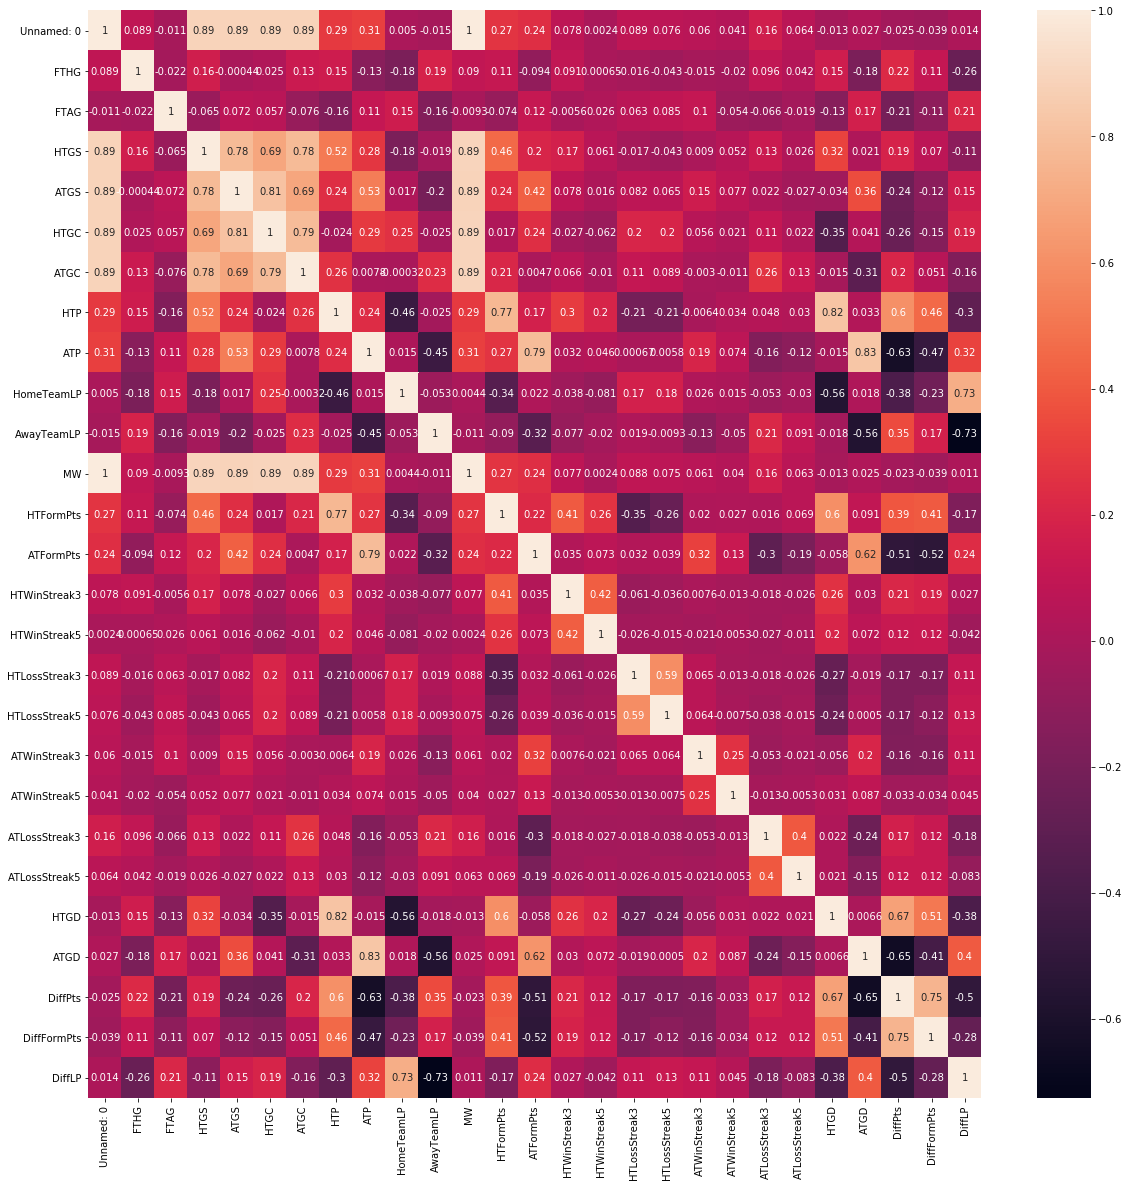

In [95]:
fig, ax = plt.subplots(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(), ax=ax, annot=True,annot_kws={'size':10})
plt.show()

In [113]:
!pip install numpy

In [114]:
import numpy as np

In [115]:
predictions = pd.DataFrame(np.column_stack([y_test.values, y_test_pred]), columns=['Actual', 'Prediction'], index=y_test.index)
predictions.head(10)

,Actual,Prediction
188,NH,NH
90,H,H
264,H,H
108,H,H
107,H,H
243,H,H
19,H,H
78,NH,NH
262,H,H
292,H,H


In [118]:
# Check back
usecols = ['Date', 'MW', 'HomeTeam', 'AwayTeam']
data = pd.read_csv('final_dataset.csv', usecols=usecols)

mapped_predictions = data.join(predictions, how='right')
mapped_predictions.head(10)

,Date,HomeTeam,AwayTeam,MW,Actual,Prediction
188,12/29/2015,Leicester,Man City,19,NH,NH
90,10/24/2015,Arsenal,Everton,10,H,H
264,2/27/2016,West Brom,Crystal Palace,27,H,H
108,1/11/2015,Southampton,Bournemouth,11,H,H
107,1/11/2015,Everton,Sunderland,11,H,H
243,6/2/2016,Newcastle,West Brom,25,H,H
19,8/17/2015,Liverpool,Bournemouth,2,H,H
78,4/10/2015,Everton,Liverpool,8,NH,NH
262,2/27/2016,Stoke,Aston Villa,27,H,H
292,3/14/2016,Leicester,Newcastle,30,H,H


In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

Home team win rate: 41.32%
Home team not win rate: 58.68%
================ TRAIN SCORE ================
              precision    recall  f1-score   support

           H       0.99      0.98      0.98       136
          NH       0.98      0.99      0.99       194

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



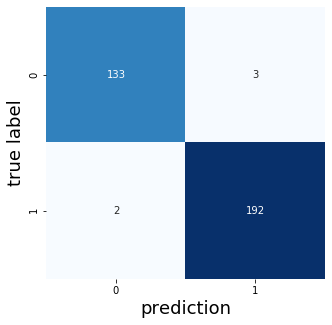

================ TEST SCORE ================
              precision    recall  f1-score   support

           H       0.90      0.90      0.90        21
          NH       0.93      0.93      0.93        29

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



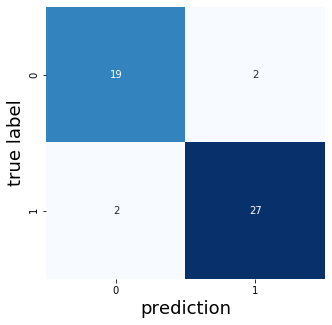

In [135]:
print("Home team win rate: {:.2f}%".format(win_rate))
print("Home team not win rate: {:.2f}%".format(100-win_rate))

print('================ TRAIN SCORE ================')
confusion_train = pd.DataFrame(confusion_matrix(y_train, y_train_pred))

print(classification_report(y_train, y_train_pred))
plt.figure(figsize = (5,5))
sns.heatmap(confusion_train, annot=True, cmap=plt.cm.Blues, cbar=False, fmt='d')
plt.ylabel('true label', fontsize=18)
plt.xlabel('prediction', fontsize=18)
plt.show()

print('================ TEST SCORE ================')
confusion_test = pd.DataFrame(confusion_matrix(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))
plt.figure(figsize = (5,5))
sns.heatmap(confusion_test, annot=True, cmap=plt.cm.Blues, cbar=False, fmt='d')
plt.ylabel('true label', fontsize=18)
plt.xlabel('prediction', fontsize=18)
plt.show()